In [1]:
#Establising mysql coonection
import mysql.connector
#connecting mysql to python
db=mysql.connector.connect(host="localhost",user="root",passwd="mahi1234",database="studdb")
print(db)

In [2]:
import seaborn as sns
import pandas as pd
#import the dataset
df=pd.read_sql_query("select * from studsmarks",db)
df

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,Histroy,Civics
0,John,M,05-04-1988,55,45,56,87,21,52,89,65
1,Suresh,M,04-05-1987,75,96,78,64,90,61,58,2
2,Ramesh,M,25-05-1989,25,54,89,76,95,87,56,74
3,Jessica,F,12-08-1990,78,96,86,63,54,89,75,45
4,Jennifer,F,02-09-1989,58,96,78,46,96,77,83,53
5,Annu,F,05-04-1988,45,87,52,89,55,89,87,52
6,Pooja,F,04-05-1987,55,64,61,58,75,58,64,61
7,Ritesh,M,25-05-1989,54,76,87,56,25,56,76,87
8,Farha,F,12-08-1990,55,63,89,75,78,75,63,89
9,Mukesh,M,02-09-1989,96,46,77,83,58,83,46,77


In [3]:
#lets check  rows and columns of dataset
df.shape

(10, 11)

In [4]:
#Lets check  number of null values in each column
df.isnull().sum()
#no null values in any columns

Name         0
Gender       0
DOB          0
Maths        0
Physics      0
Chemistry    0
English      0
Biology      0
Economics    0
Histroy      0
Civics       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
Name         10 non-null object
Gender       10 non-null object
DOB          10 non-null object
Maths        10 non-null int64
Physics      10 non-null int64
Chemistry    10 non-null int64
English      10 non-null int64
Biology      10 non-null int64
Economics    10 non-null int64
Histroy      10 non-null int64
Civics       10 non-null int64
dtypes: int64(8), object(3)
memory usage: 1008.0+ bytes


In [6]:
#lets describe the data
df.describe()

,Maths,Physics,Chemistry,English,Biology,Economics,Histroy,Civics
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000
mean,59.600000,72.300000,75.300000,69.700000,64.700000,72.700000,69.700000,60.5000
std,19.460501,20.661559,14.000397,14.453373,26.998148,14.629119,14.453373,25.3432
min,25.000000,45.000000,52.000000,46.000000,21.000000,52.000000,46.000000,2.0000
25%,54.250000,56.250000,65.000000,59.250000,54.250000,58.750000,59.250000,52.2500
50%,55.000000,70.000000,78.000000,69.500000,66.500000,76.000000,69.500000,63.0000
75%,70.750000,93.750000,86.750000,81.250000,87.000000,86.000000,81.250000,76.2500
max,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000,89.0000


In [19]:
#Lets check who all got distinction in englishs
df.loc[df["English"]>=75,["Name","Gender","DOB","English"]]

,Name,Gender,DOB,English
0,John,M,05-04-1988,87
2,Ramesh,M,25-05-1989,76
5,Annu,F,05-04-1988,89
8,Farha,F,12-08-1990,75
9,Mukesh,M,02-09-1989,83


In [20]:
#Lets check who all got distinction in maths
df.loc[df["Maths"]>=75,["Name","Gender","DOB","Maths"]]

,Name,Gender,DOB,Maths
1,Suresh,M,04-05-1987,75
3,Jessica,F,12-08-1990,78
9,Mukesh,M,02-09-1989,96


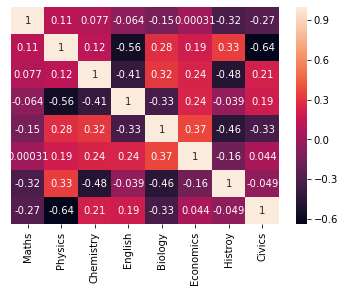

In [7]:
#lets check correlation between columns on heatmap
sns.heatmap(df.corr(),yticklabels=False,annot=True)

In [8]:
#names of toppers in each subject and their marks
def highmarks():
  subjects=['Maths', 'Physics', 'Chemistry', 'English','Biology', 'Economics', 'Histroy', 'Civics']
  for subject in subjects:
    print(df.loc[df[subject]==df[subject].max(),["Name","Gender","DOB",subject]])
    print()
    print()
highmarks()    

     Name Gender         DOB  Maths
9  Mukesh      M  02-09-1989     96


       Name Gender         DOB  Physics
1    Suresh      M  04-05-1987       96
3   Jessica      F  12-08-1990       96
4  Jennifer      F  02-09-1989       96


     Name Gender         DOB  Chemistry
2  Ramesh      M  25-05-1989         89
8   Farha      F  12-08-1990         89


   Name Gender         DOB  English
5  Annu      F  05-04-1988       89


       Name Gender         DOB  Biology
4  Jennifer      F  02-09-1989       96


      Name Gender         DOB  Economics
3  Jessica      F  12-08-1990         89
5     Annu      F  05-04-1988         89


   Name Gender         DOB  Histroy
0  John      M  05-04-1988       89


    Name Gender         DOB  Civics
8  Farha      F  12-08-1990      89




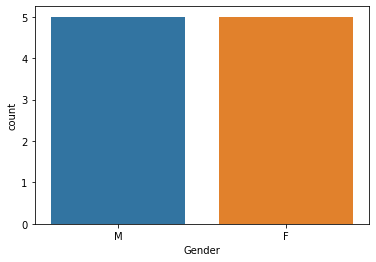

In [9]:
#number of girls and boys
sns.countplot(x='Gender',data=df)

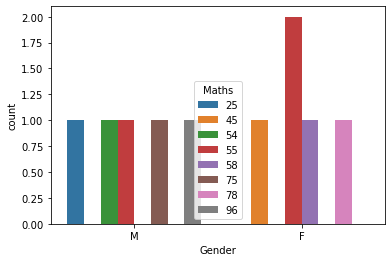

In [10]:
#comparing between boys and girls in maths
sns.countplot(x='Gender',hue='Maths',data=df)

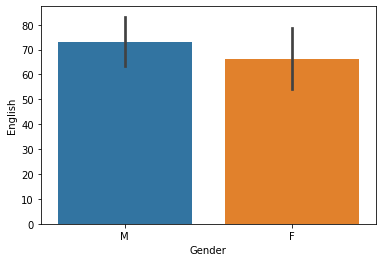

In [11]:
sns.barplot(x='Gender',y='English',data=df)

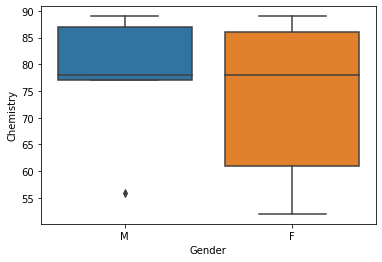

In [12]:
sns.boxplot(x='Gender',y='Chemistry',data=df)

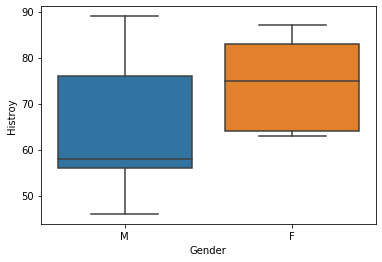

In [13]:
sns.boxplot(x='Gender',y='Histroy',data=df)

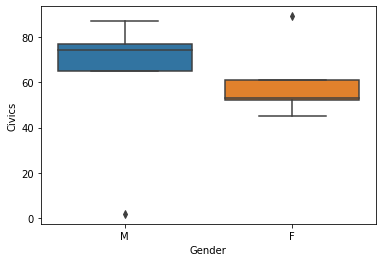

In [14]:
sns.boxplot(y='Civics',x='Gender',data=df)

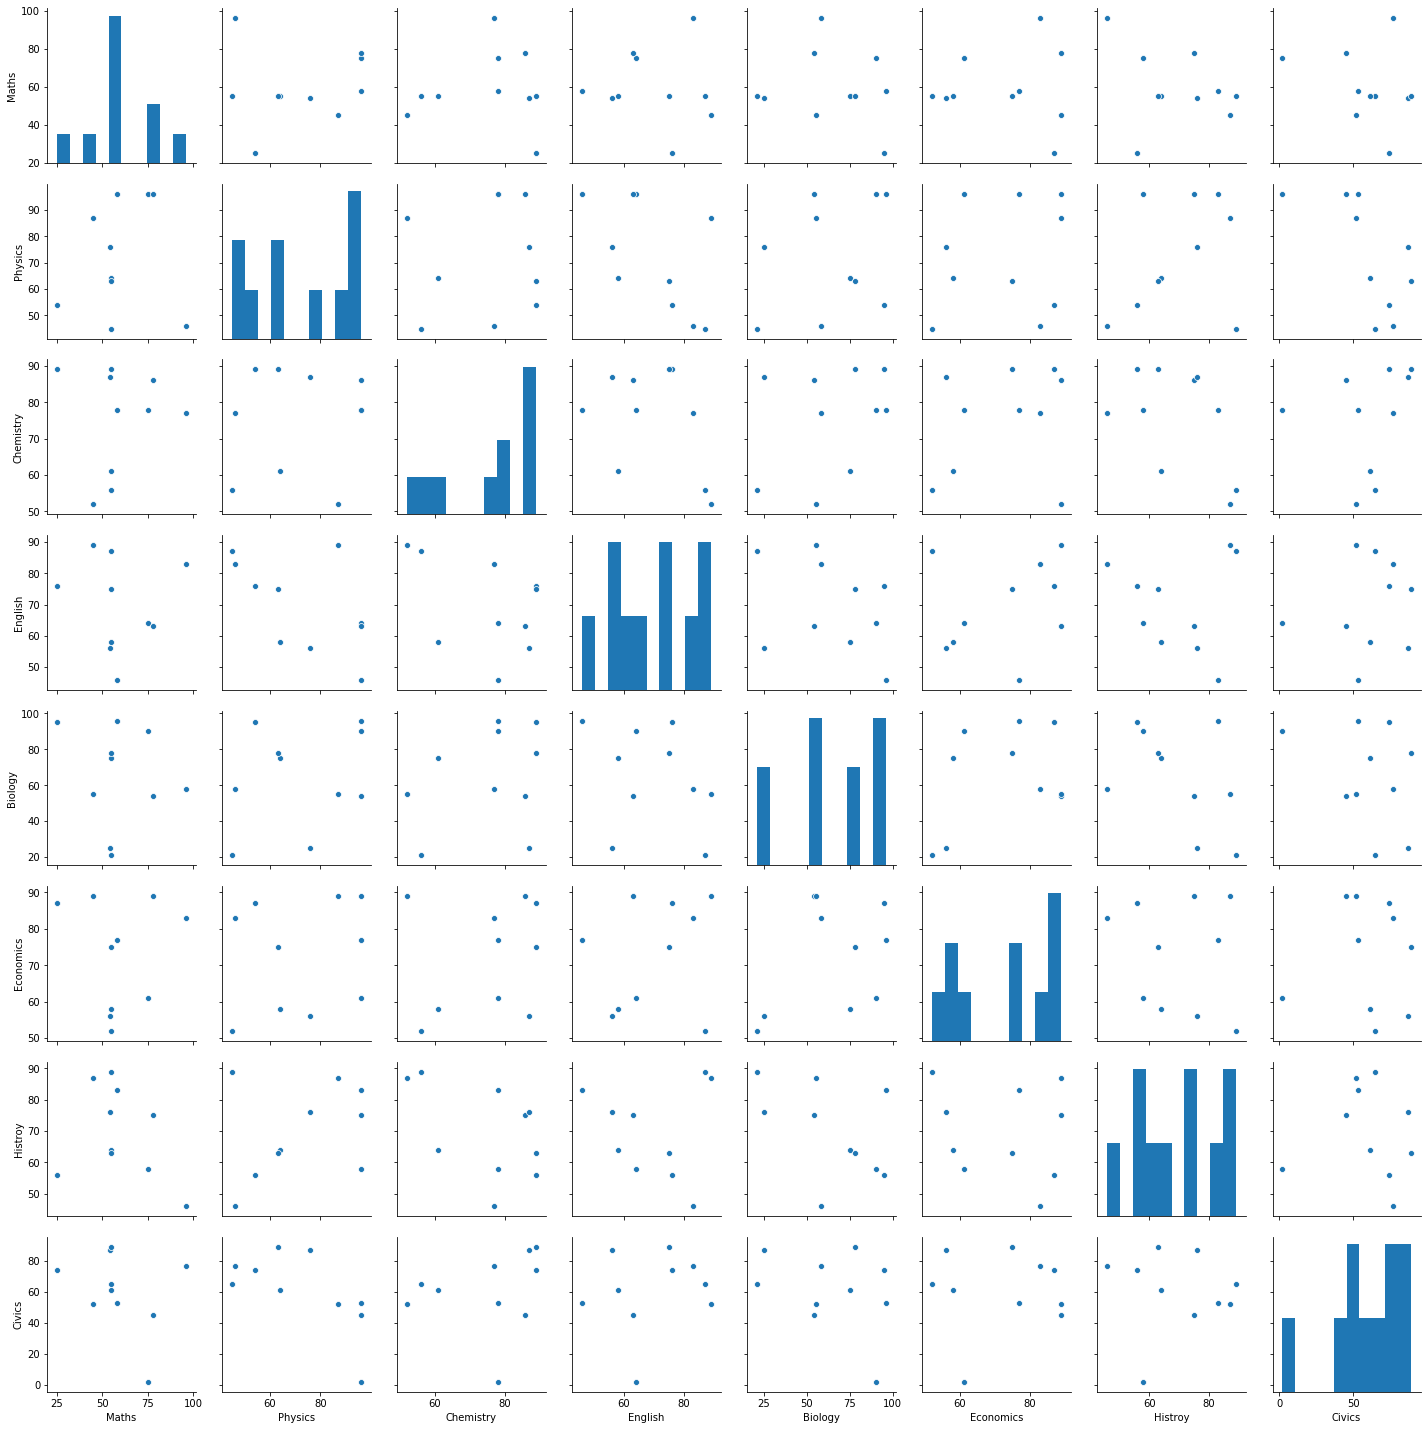

In [15]:
sns.pairplot(df)

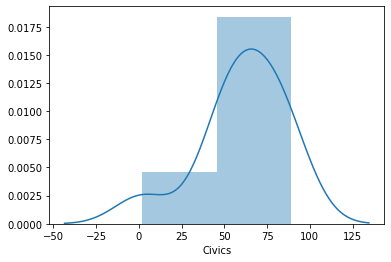

In [22]:
#civics columns is left skew
sns.distplot(df['Civics'])

In [16]:
#lets check skewness of data
df.skew()

Maths        0.246964
Physics     -0.045336
Chemistry   -0.746462
English     -0.131222
Biology     -0.496446
Economics   -0.245555
Histroy     -0.131222
Civics      -1.332448
dtype: float64